In [12]:
# Read and Plot individual seismic shots from KOPRI
# Zachary Katz
# 20 October 2025

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

file_path = './_data/KPDC_David_Seismic_2022/21X/X19.sgd'

with open(file_path, "rb") as f:
    header = f.read(256)
print(header[:64])


b'\x00\x19\x80X\x00\x00\x00\x00\x00\x00!\x13G\t8\x08\x00\x00\x00\x00\x00\x00\x04\x00\x00\x8f\xff\x01\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x0f\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc3\x1929'


In [49]:
data = np.fromfile(file_path, dtype=">i2")  

nsamples = 96032     
ntraces = data.size // nsamples

data = data[:ntraces * nsamples].reshape(ntraces, nsamples)

da = xr.DataArray(
    data,
    dims=("trace", "sample"),
    coords={
        "trace": np.arange(ntraces),
        "sample": np.arange(nsamples)
    },
    name="amplitude"
)

print(da)

<xarray.DataArray 'amplitude' (trace: 32, sample: 96032)> Size: 6MB
array([[    25, -32680,      0, ...,  26790, -17371,  25699],
       [-17587,  22159, -17384, ...,  23060,  15345,  16184],
       [ 15234,  -4759, -17588, ...,  14154,  15328, -15428],
       ...,
       [-17672,   9201,  15131, ...,  -1548, -17652,  25085],
       [-17604,  14255,  15151, ...,  15417, -17591, -32326],
       [ 15297, -29622,     25, ...,  -4082,  15288, -10527]],
      shape=(32, 96032), dtype='>i2')
Coordinates:
  * trace    (trace) int64 256B 0 1 2 3 4 5 6 7 8 ... 23 24 25 26 27 28 29 30 31
  * sample   (sample) int64 768kB 0 1 2 3 4 5 ... 96027 96028 96029 96030 96031


In [26]:
size = os.path.getsize(file_path)
print(f"File size: {size:,} bytes")

data = np.fromfile(file_path, dtype=">i2")
print("Array length:", data.size)
print("First few samples:", data[:10])

File size: 6,146,048 bytes
Array length: 3073024
First few samples: [    25 -32680      0      0      0   8467  18185  14344      0      0]


In [45]:
for samples_per_trace in range(5, 5000001, 1):
    ntr = data.size / samples_per_trace
    if ntr.is_integer():
        print(f"{samples_per_trace} samples/trace → {int(ntr)} traces")

8 samples/trace → 384128 traces
16 samples/trace → 192064 traces
32 samples/trace → 96032 traces
64 samples/trace → 48016 traces
128 samples/trace → 24008 traces
256 samples/trace → 12004 traces
512 samples/trace → 6002 traces
1024 samples/trace → 3001 traces
3001 samples/trace → 1024 traces
6002 samples/trace → 512 traces
12004 samples/trace → 256 traces
24008 samples/trace → 128 traces
48016 samples/trace → 64 traces
96032 samples/trace → 32 traces
192064 samples/trace → 16 traces
384128 samples/trace → 8 traces
768256 samples/trace → 4 traces
1536512 samples/trace → 2 traces
3073024 samples/trace → 1 traces


Text(0.5, 1.0, 'Seismic Shot (raw)')

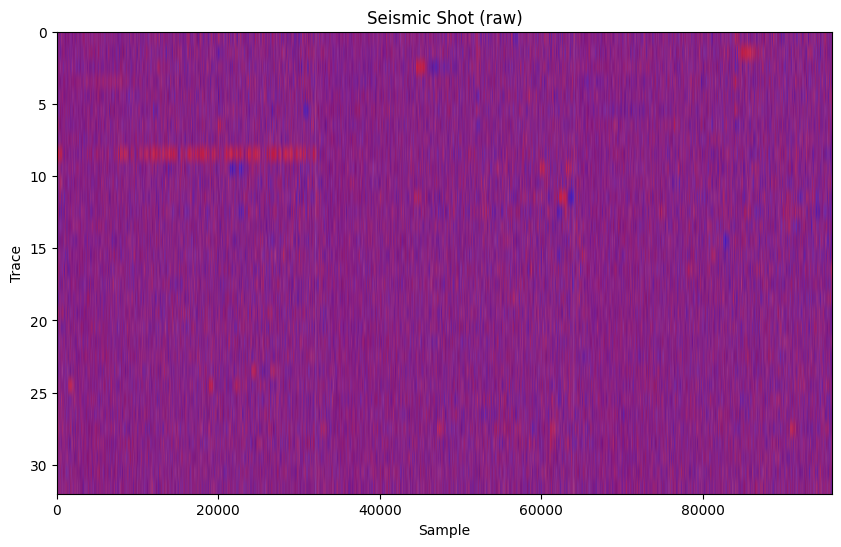

In [50]:
# Quick visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(da, aspect='auto', cmap='seismic', extent=[0, nsamples, ntraces, 0])
ax.set_xlabel("Sample")
ax.set_ylabel("Trace")
ax.set_title("Seismic Shot (raw)")